# MODELOS LINEALES (REGRESIÓN)

Antes de entrar en el análisis de modelos lineales es necesario comprender de qué se trata el enfoque de la estadística aplicada. Para verlo de  manera sencilla se puede decir que la estadística empieza con un problema, continúa con la recolección de datos, sigue con el análisis de los mismos y finaliza con conclusiones.

El aspecto más importante es la formulación correcta del problema ya que, de su comprensión, depende el desarrollo estadístico. La formulación del problema puede resumirse en los siguientes pasos <sup><a name="myfootnote1">1</a></sup>

1. Conocer los antecedentes.
2. Entender los objetivos.
3. Comprender lo que el 'cliente' busca.
4. Poner el problema en términos estadísticos.

También es necesario conocer los datos recolectados. Para ello hay que tener en cuenta:

1. Si los datos son observacionales o experimentales.
2. Si hay cuestiones sin responder.
3. Si existen valores perdidos.
4. Cuál ha sido la forma de codificar los datos.
5. Cuáles son las unidades de medidas.
6. Revisar si existen datos corruptos o errores en las entradas.

Una vez revisados estos aspectos, se procede con el análisis de los datos.

## Análisis Inicial o Análisis Exploratorio

Aunque es un paso simple, se trata de un momento crucial para la comprensión de los datos. El análisis inicial da una perspectiva general del problema y permite identificar aspectos que podrían ser susceptibles de ajustar, antes de avanzarcon el proceso. Existen dos maneras de exploración: análisis numérico y análisis gráfico; ambos se complementan y ofrecen información.

Para este procedimiento se va a emplear algunas bases de datos que se encuentran asociadas al programa `R`. Para este ejercicio se va a emplear la base de datos llamada `pima` asociada a la librería `faraway` (si no se encuentra instalada hay que proceder a instalarla). Los datos se llaman con la siguiente línea:

In [1]:
data(pima, package="faraway")

En este comando hay dos argumentos para considerar: `data(x, package)`, donde el argumento `x` hace referencia al conjunto de datos a emplear (en este caso `pima`) y `package` se refiere a la librería asociada (`faraway`). Es importante anotar las comillas en el nombre del paquete o librería ya que la selección por parte del software se basa en caracteres, si no se colocan las comillas el programa lo interpreta como un objeto y puede generar un error en la ejecución del comando.

Otra manera de hacerlo es llamar la librería y, luego, importar los datos. Se puede emplear la siguiente línea de comandos y los resultados son los mismos:

In [2]:
library(faraway)
data(pima)

In [3]:
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ pregnant : int  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose  : int  148 85 183 89 137 116 78 115 197 125 ...
 $ diastolic: int  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps  : int  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin  : int  0 0 0 94 168 0 88 0 543 0 ...
 $ bmi      : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ diabetes : num  0.627 0.351 0.672 0.167 2.288 ...
 $ age      : int  50 31 32 21 33 30 26 29 53 54 ...
 $ test     : int  1 0 1 0 1 0 1 0 1 1 ...


El conjunto de datos correspondea un estudio realizado por el Instituto Nacional de la Diabetes y Enfermedades Digestivas a 768 indígenas Pima adultas viviendo cerca de Phoenix. Las variables registradas son:

- `pregnant` Numero de veces que ha estado embarazada.
- `glucose` Concentración de glucosa plasmática a las 2 horas en una prueba oral de tolerancia a la glucosa.
- `diastolic` Presión distólica (mm Hg).
- `triceps` Espesor de los pliegues cutáneos en los tríceps (mm)
-  `ìnsulin` 2 horas de insulina en suero (mu U/ml)
- `bmi` Índice de Masa Corporal (peso en kg/altura en $m^{2}$)
- `diabetes` Función pedigrí de la diabetes (Es una función que representa la probabilidad de que contraigan la enfermedad mediante la extrapolación de la historia de su antepasado)
- `age` Edad en Años
- `test` Prueba de signos de diabetes (0 = Negativo; 1 = Positivo)

Una visión inicial de los datos se puede obtener mediante los comandos `head` y `tail` que muestran el inicio y el final de la tabla (tambien se puede usar el comando `View` pero este es procedente cuando la tabla es corta). Los comandos tienen dos elementos: `x` que hace referencia a la tabla que se desea visualizar y `n` que se refiere a la cantidad de observaciones a mostrar. Por defecto `n = 6`.

In [4]:
head(pima,10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [5]:
tail(pima,10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
759,1,106,76,0,0,37.5,0.197,26,0
760,6,190,92,0,0,35.5,0.278,66,1
761,2,88,58,26,16,28.4,0.766,22,0
762,9,170,74,31,0,44.0,0.403,43,1
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


Se puede empezar con un resumen numérico de los datos usando la función `summary`:

In [6]:
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

Algunos datos se observan raros; por ejemplo, el número de veces que ha estado embarazada presenta un máximo de 17, raro pero no imposible. Sim embargo, la presión diastólica muestra valores cero lo cual puede corresponder a datos perdidos pues ausencia de presión en la sangre no es buen síntoma. Una opción para la comprender esta variables es ordenarla (usando la función `sort`)

In [7]:
head(sort(pima$diastolic),50)

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0 24 30 30 38 40 44 44 44 44 46 46 48 48 48 48

Se aprecian 35 observaciones con valores cero lo que sugiere que el dato no se registró debido a problemas en la investigación por lo que asignar estas observaciones como datos perdidos sería lo correcto. El procedimiento es el siguiente:

In [8]:
pima$diastolic[pima$diastolic == 0] <- NA
pima$glucose[pima$glucose == 0] <- NA
pima$triceps[pima$triceps == 0] <- NA
pima$insulin[pima$insulin == 0] <- NA
pima$bmi[pima$bmi == 0] <- NA

In [9]:
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

Ahora se debe transformar en factor la variable `test` dado que se trata de una variable categórica:

In [10]:
pima$test <- factor(pima$test)
levels(pima$test) <- c("negative","positive")
summary(pima)

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

In [11]:
head(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,NA,33.6,0.627,50,positive
2,1,85,66,29,NA,26.6,0.351,31,negative
3,8,183,64,NA,NA,23.3,0.672,32,positive
4,1,89,66,23,94,28.1,0.167,21,negative
5,0,137,40,35,168,43.1,2.288,33,positive
6,5,116,74,NA,NA,25.6,0.201,30,negative


Con esto corregido, el siguiente paso es la exploración gráfica. Ésta se puede hacer por dos vías: funciones básicas para gráficos y funciones especiales (de la librería `ggplot2`). Para las funciones básicas las lineas de comado son las siguientes:

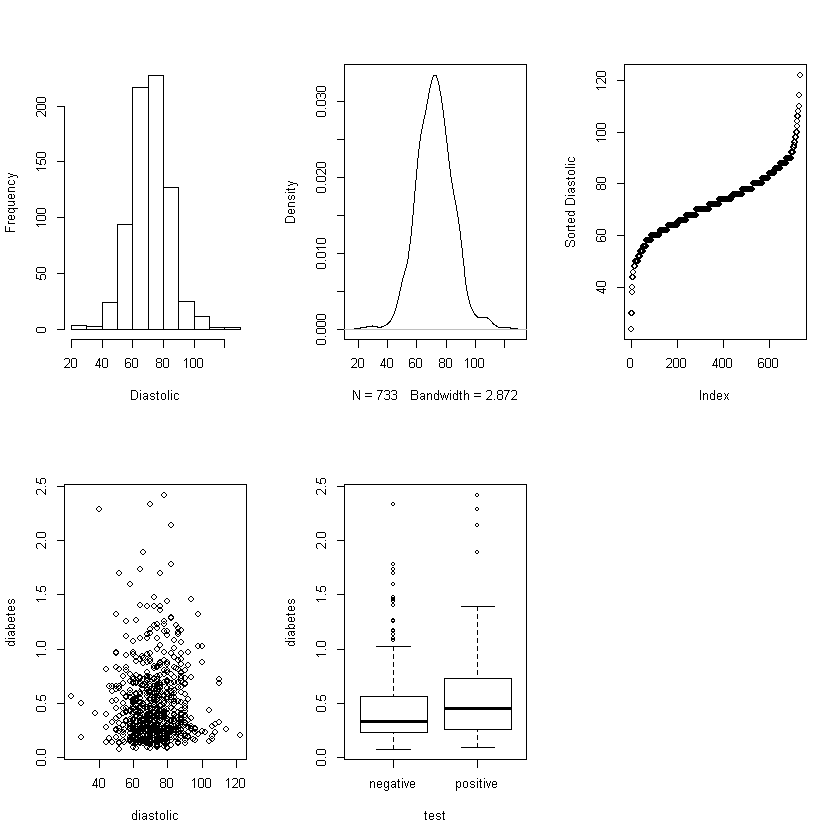

In [12]:
par(mfrow=c(2,3))
hist(pima$diastolic,xlab="Diastolic",main="")
plot(density(pima$diastolic,na.rm=TRUE),main="")
plot(sort(pima$diastolic),ylab="Sorted Diastolic")
plot(diabetes ~ diastolic,pima)
plot(diabetes ~ test,pima)
par(mfrow=c(1,1))

## Estimación

Los modelos lineales se utilizan para explicar la relación entre una variable dependiente $Y$ y una o más variables independientes $X_{1}, X_{2}, \dots; X_{p}$ (que también suelen llamarse variables predictoras o explicatorias). El subíndice $p$ indica el número de predictores que intervienen en la relación.

Si $p=1$ se denomina regresión simple, si $p>1$ se llama regresión múltiple. Un aspecto importante a tener en cuenta es que $Y$ debe ser siempre una variable continua, mientras que las covariables $X$ pueden ser continuas, discretas o categóricas. El análisis de la regresión busca dos objetivos:

1. Predecir posibles respuestas dados unos valores específicos de los predictores
2. Evaluar el efecto de (o la relación entre) las variables explicativas o independientes y la variable de respuesta o dependiente

De manera general, el modelo puede expresarse de la forma:

$$
Y = f\left(X_{1},X_{2},\dots,X_{p}\right) + \varepsilon
$$

o bien

$$
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \dots + \beta_{p}X_{p} + \varepsilon
$$

y su correspondiente expresión matricial

$$
y = X\beta + \varepsilon
$$

En todos los casos, los valores $\beta$ son desconocidos; la estimación se basa en calcular dichos valores con base en los datos recolectados. Se trata de una operación algebraica que, dependiendo del número de parámetros y de observaciones, representa complejidad. Por lo tanto, el uso de herramientas computacionales es de gran utilidad.

### REGRESIÓN SIMPLE

* El valor esperado es:

$$
E \left[ Y|X \right] = \beta_{0} + \beta_{1} X
$$

* La Variable de Respuesta viene dada por:

$$
Y = \beta_{0} + \beta_{1} X + \varepsilon
$$

* Se busca minimizar:

$$
L = \sum_{i=1}^{n} \varepsilon_{i}^{2} = \sum_{i=1}^{n} \left( y_{i} - \beta_{0} - \beta_{1} x_{i} \right)^{2}
$$

* Los parámetros se calculan con:

$$
\widehat{\beta_{1}} = \frac{\sum_{i=1}^{n} x_{i}y_{i} - n\overline{X}\overline{Y}}{\sum_{i=1}^{n} x_{i}^{2} - n \overline{X}^{2}}
$$

$$
\widehat{\beta_{0}} = \overline{Y} - \widehat{\beta_{1}}\overline{X}
$$

### Propiedades de los Parámetros:

\begin{eqnarray}
E \left[ \widehat{\beta_{1}} \right] &=& \beta_{1}\\
E \left[ \widehat{\beta_{0}} \right] &=& \beta_{0}\\
Var \left( \widehat{\beta_{1}} \right) &=& \frac{\sigma^{2}}{\sum_{i=1}^{n} x_{i}^{2} - n \overline{X}^{2}}\\
Var \left( \widehat{\beta_{1}} \right) &=& \sigma^{2} \left[ \frac{1}{n} + \frac{\overline{X}^{2}}{\sum_{i=1}^{n} x_{i}^{2} - n \overline{X}^{2}} \right]
\end{eqnarray}

Ahora, para simplificar escritura consideremos

$$
S_{XX} = \sum_{i=1}^{n} x_{i}^{2} - n \overline{X}^{2} \text{ y } S_{XY} = \sum_{i=1}^{n} x_{i}y_{i} - n\overline{X}\overline{Y}
$$

Para estimar la varianza:

\begin{eqnarray}
SS_{E} &=& S_{YY} - \widehat{\beta_{1}}S_{XX} \\
E\left[ SS_{E} \right] &=& \left( n - 2 \right) \sigma^{2}\\
\widehat{\sigma}^{2} &=& \frac{SS_{E}}{n-2} = MS_{E}
\end{eqnarray}

Para contrastar las hipótesis:


\begin{equation}
H_{0}: \widehat{\beta_{k}} = \beta_{k}^{\ast} \qquad H_{0}: \widehat{\beta_{k}} \neq \beta_{k}^{\ast} \quad k=0,1
\end{equation}

Y los estadísticos de prueba son:

\begin{equation}
t_{\beta_{0}} = \frac{\widehat{\beta_{0}} - \beta_{0}^{\ast}}{\sqrt{MS_{E}/S_{XX}}} \qquad t_{\beta_{1}} = \frac{\widehat{\beta_{1}} - \beta_{1}^{\ast}}{\sqrt{MS_{E}\left( \frac{1}{n} + \frac{\overline{X}^{2}}{S_{XX}} \right)}}
\end{equation}


Sin embargo $\beta_{k}^{\ast}$ se desconoce, entonces

\begin{equation}
H_{0}: \widehat{\beta_{k}} = 0 \qquad H_{0}: \widehat{\beta_{k}} \neq 0 \quad k=0,1
\end{equation}

Si se descompone $S_{YY}$ se tiene:

\begin{equation}
S_{YY} = \sum_{i=1}^{n} \left( y_{i} - \overline{Y} \right)^{2} = SS_{R} + SS_{E}
\end{equation}

A partir del cual se obtiene:

\begin{equation}
F_{0} = \frac{SS_{R}/1}{SS_{E}/(n-2)} = \frac{MS_{R}}{MS_{E}}
\end{equation}

Que será el estadístico de contraste para la idoneidad del modelo

## REGRESIÓN MÚLTIPLE

* Modelo de Regresión Lineal Múltiple

\begin{equation}
y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \dots + \beta_{k} X_{k} + \epsilon
\end{equation}

* Modelo Observado

\begin{equation}
y_{j} = \beta_{0} + \sum_{i=1}^{k} \beta_{i} x_{ij} + \epsilon_{j}
\end{equation}

El modelo puede expresarse matricialmente:

\begin{equation}
\mathbf{y}_{n \times 1} = \mathbf{X}_{n \times k} \mathbf{\beta}_{k \times 1} + \mathbf{\epsilon}_{n \times 1}
\end{equation}

Siendo:

$$
\mathbf{y} = \begin{pmatrix}
y_{1} \\
\vdots \\
y_{n} \\
\end{pmatrix}
\qquad
\mathbf{X} = \begin{pmatrix}
1 & \left( x_{11} - \overline{x}_{1} \right) & \dots & \left( x_{k1} - \overline{x}_{k} \right) \\
\vdots & \vdots & \vdots & \vdots \\
1 & \left( x_{1n} - \overline{x}_{1} \right) & \dots & \left( x_{kn} - \overline{x}_{k} \right)\\
\end{pmatrix}
$$

$$
\mathbf{\beta} = \begin{pmatrix}
\beta_{0}\\
\beta_{1}\\
\vdots \\
\beta_{k}\\
\end{pmatrix}
\qquad
\mathbf{\epsilon} = \begin{pmatrix}
\epsilon_{1}\\
\vdots\\
\epsilon_{n}\\
\end{pmatrix}
$$

* Función de Pérdida

\begin{equation}
L = \mathbf{y y^{\prime}} - 2 \mathbf{\beta^{\prime} X^{\prime} y} + \mathbf{\beta^{\prime} X^{\prime} X\beta}
\end{equation}

* Se Obtiene

\begin{equation}
\mathbf{X X^{\prime} \widehat{\beta}} = \mathbf{X^{\prime} y}
\end{equation}

Luego:

* Parámetros

\begin{eqnarray}
\mathbf{\widehat{\beta}} &=& \left( \mathbf{X X^{\prime}} \right)^{-1} \mathbf{X^{\prime} y}\\
E \left[ \widehat{\beta} \right] &=& \beta\\
Cov \left( \widehat{\beta} \right) &=& \sigma^{2} \left( \mathbf{X X^{\prime}} \right)^{-1}
\end{eqnarray}

* Se suele contrastar

\begin{eqnarray*}
H_{0} &:& \beta_{1} = \beta_{2} = \dots = \beta_{k} = 0 \\
H_{1} &:& \beta_{i} \neq 0, \text{ para algún } i
\end{eqnarray*}

Igual que en la RLS, se tiene:

\begin{equation}
SS_{yy} = SS_{R} + SS_{E}
\end{equation}

Además se tiene:

\begin{eqnarray}
\frac{SS_{R}}{\sigma^{2}} &\sim& \chi^{2}_{k} \\
\frac{SS_{E}}{\sigma^{2}} &\sim& \chi^{2}_{n-k-1} 
\end{eqnarray}

Con lo anterior se considera el estadístico:

\begin{equation}
F_{0} = \frac{SS_{R}/k}{SS_{E}/(n-k-1)} = \frac{MS_{R}}{MS_{E}}
\end{equation}

Contrastándolo contra $F_{\alpha,k,n-k-1}$. Donde se emplean las siguientes identidades:

\begin{eqnarray}
SS_{E} &=& SS_{yy} - \sum_{i=1}^{k} \widehat{\beta}_{i}S_{iy}\\
SS_{R} &=& \sum_{i=1}^{k} \widehat{\beta}_{i}S_{iy}
\end{eqnarray}

* Para el Contraste de Parámetros:

\begin{eqnarray*}
H_{0} &:& \beta_{i} = 0\\
H_{1} &:& \beta_{i} \neq 0
\end{eqnarray*}

Se emplea:

\begin{equation}
t_{0} = \frac{\widehat{\beta}_{i}}{\sqrt{MS_{E}C_{ii}}}
\end{equation}

Donde $C_{ii}$ se obtiene de:

$$
\mathbf{X X^{\prime}} = \begin{pmatrix}
\boldsymbol{C_{11}} & C_{12} & \dots & C_{1n}\\
C_{21} & \boldsymbol{C_{22}} & \dots & C_{1n}\\
\vdots & \vdots & \vdots & \vdots \\
C_{n1} & C_{n2} & \dots & \boldsymbol{C_{nn}}
\end{pmatrix}
$$

### Ejemplo usando R

La literatura presenta múltiples ejemplo para modelos lineales. Para este ejemplo, se usará un conjunto de datos asociado al programa R. Se analizará el caso particular del conjunto de datos denominado `gala` de la librería `faraway` que hace referencia a las especies encontradas en las Islas Galápago. Las variables que contiene son:

- `Species` número de especies encontradas en la isla
- `Endemics` número de especies endémicas
- `Area` area de la isla en Km<sup>2</sup>
- `Elevation` altitud de la isla en m
- `Nearest` distancia desde la isla más cercana (Km)
- `Scruz` Distancia de Santa Cruz a la isla
- `Adjacent` área de la isla adjacente (Km<sup>2</sup>)

El ajuste del modelo lineal se hace empleado el comando `lm()` cuya sintanxis debe especificar los predictores; además, se debe especificar un el argumento `data=` donde se relaciona el conjunto de datos a emplear.

Primero, se deben cargar los datos:

In [13]:
data(gala, package="faraway")
head(gala)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


Lo correcto es iniciar con el planteamiento del problema. Para efectos del ejercicio se seleccionarán dos variables: `Species` y `Endemic`.
Se busca establecer si el número de especies encontradas en la isla depende del número de Especies Endémicas.
Lo siguiente es realizar un análisis exploratorio con las variables seleccionadas:

In [14]:
# Un resumen numérico
varsel<-gala[,c(1,2)]
summary(varsel)

    Species          Endemics    
 Min.   :  2.00   Min.   : 0.00  
 1st Qu.: 13.00   1st Qu.: 7.25  
 Median : 42.00   Median :18.00  
 Mean   : 85.23   Mean   :26.10  
 3rd Qu.: 96.00   3rd Qu.:32.25  
 Max.   :444.00   Max.   :95.00  

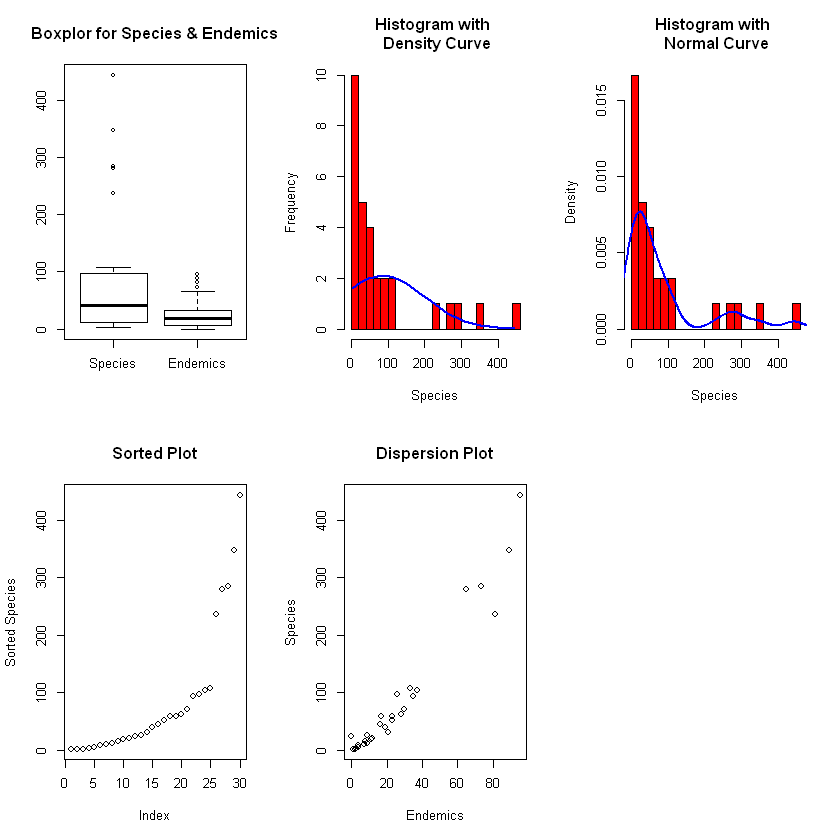

In [15]:
# Algunos gráficos exploratorios
par(mfrow=c(2,3))
x <- varsel$Species
boxplot(varsel, main="Boxplor for Species & Endemics")
h<-hist(x, breaks=25, col="red", xlab="Species", main="Histogram with \n Density Curve")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
h<-hist(x, freq = F, breaks=25, col="red", xlab="Species", main="Histogram with \n Normal Curve")
lines(density(x), col="blue", lwd=2)
plot(sort(x),ylab="Sorted Species", main = "Sorted Plot")
with(gala, plot(Endemics,Species, main = "Dispersion Plot"))
par(mfrow=c(1,1))

Ahora, se procede a estimar el modelo.
El comando `lm()` hace referencia a la estimación de los modelos lineales; contiene dos elementos importantes en sus argumentos: `formula` y `data`. La primera describe la relación que se ha planteado para las variables donde la virgulilla (~) denota la dependencia; así, para el caso específico del ejercicio, debe escribirse: `Species~Endemics`, y en el segundo argumento debe declararse el conjunto de datos del cual se toman las variables: `data = varse` o, si se desea: `data = gala` ya que el primer conjunto de datos corresponde a una selección de variables del segundo.
El comando `sumary` de la libreía `faraway` permite mostrar los estadísticos más relevantes para esta parte del ejercicio:

In [16]:
fit<-lm(Species~Endemics, data = varsel)
library(faraway)
sumary(fit)

            Estimate Std. Error t value  Pr(>|t|)
(Intercept) -21.0480     7.1138 -2.9588  0.006219
Endemics      4.0721     0.1899 21.4433 < 2.2e-16

n = 30, p = 2, Residual SE = 27.94996, R-Squared = 0.94


O bien, ver el resumen numérico del modelo completo:

In [17]:
summary(fit)


Call:
lm(formula = Species ~ Endemics, data = varsel)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.791 -15.894   3.507  12.088  78.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.0480     7.1138  -2.959  0.00622 ** 
Endemics      4.0721     0.1899  21.443  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27.95 on 28 degrees of freedom
Multiple R-squared:  0.9426,	Adjusted R-squared:  0.9406 
F-statistic: 459.8 on 1 and 28 DF,  p-value: < 2.2e-16


Del estadístico `F` se desprende el análisis de la Varianza:

In [18]:
summary(aov(fit))

            Df Sum Sq Mean Sq F value Pr(>F)    
Endemics     1 359208  359208   459.8 <2e-16 ***
Residuals   28  21874     781                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Ahora, se pueden graficar los intervalos de confianza:

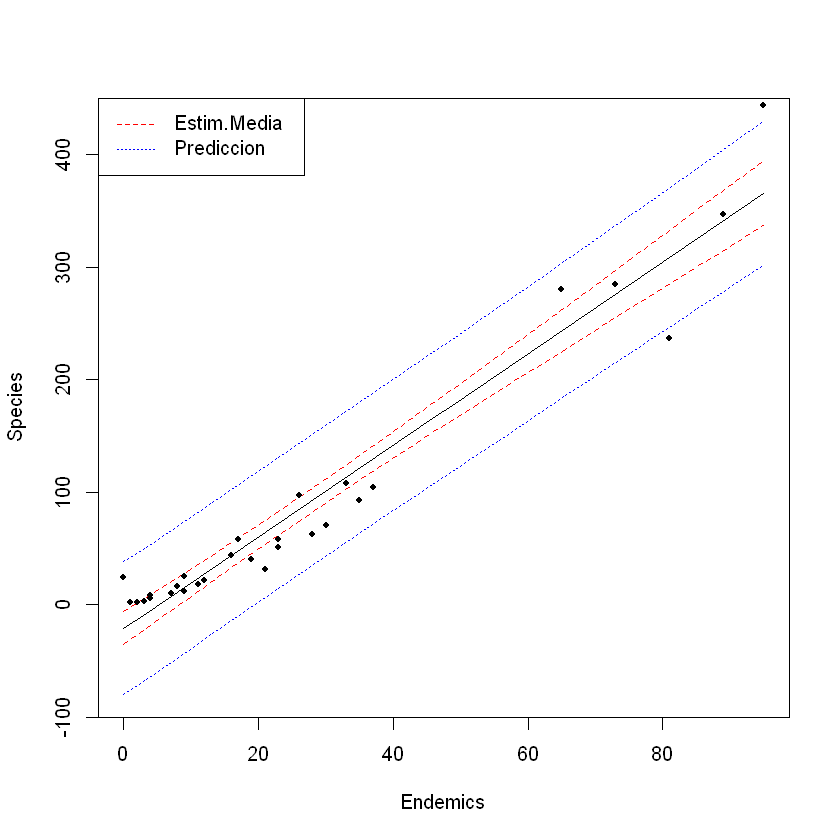

In [19]:
x0<-seq(min(varsel$Endemics),max(varsel$Endemics),length=30)
pred.m<-predict(fit,data.frame(Endemics=x0),interval="confidence",se.fit=T)
pred.p<-predict(fit,data.frame(Endemics=x0),interval="prediction",se.fit=T)

matplot(x0,cbind(pred.m$fit,pred.p$fit[,-1]),lty=c(1,2,2,3,3),
        col=c("black","red","red","blue","blue"),type="l",xlab="Endemics",
        ylab="Species")

legend('topleft',c("Estim.Media","Prediccion"),lty=c(2,3),
       col=c("red","blue"))

points(varsel$Endemics,varsel$Species, pch = 20)

### Ejercicio

Con el mismo conjunto de datos `gala` el estudiante realizará la exploración de las diferentes combinaciones de variables usando como variable dependiente la denominada `Species`. Debe discutir la interpretación de los resultados con sus compañeros de clase.

### Taller en clase

El conjunto de datos del enlace https://www.dropbox.com/s/dn30luorh63w1h3/acme.csv?dl=0 contiene información sobre los excedentes de los rendimiento mensuales de la Corporación Acme registrada en las Bolsas de Valores de Nueva York durante un periodo de cinco años. Las variables del archivo son las siguientes:

* `market` representa el excesos de rentas del mercado en conjunto
* `acme` se refiere al excedo de rendimientos de la compañía Acme
* `month` es una cadena de caracteres que denota el mes en el cual se recolectaron los datos

El estudiante debe plantear el modelo lineal adecuado y realizar el correspondiente análisis.

### Taller en casa

El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.

Las variables registradas son las siguientes:

* `age` - edad
* `job`- tipo de trabajo
* `marital` - estado civil
* `education` - nivel educativo
* `default` - crédito en incumplimiento
* `housing` - crédito de vivienda
* `loan` - préstamos personal
* `contact` - tipo de contacto realizado
* `month` - mes en que se hizo el último contacto
* `day_of_week` - último día de contacto de la semana
* `duration` - duración del último contacto, en segundos
* `campaign` - número de contactos realizados durante esta campaña y para este cliente
* `pdays` - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
* `previous`- número de contactos realizados antes de esta campaña y para este cliente
* `poutcome` - resultado de la campaña de marketing anterior
* `emp.var.rate`- tasa de variación del empleo - indicador trimestral
* `cons.price.idx` - índice de precios al consumidor - indicador mensual
* `cons.conf.idx` - índice de confianza del consumidor - indicador mensual
* `euribor3m` - euribor tasa de 3 meses - indicador diario
* `nr.employed` - número de empleados
* `y` - ¿el cliente ha suscrito un depósito a plazo?

Los datos fueron tomados de:
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.